## Imports:

In [191]:
import numpy as np
import pandas as pd

import sklearn as skl
import sklearn.preprocessing as preproc
from sklearn.model_selection import train_test_split
import sklearn.model_selection as modsel
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
import keras
import tensorflow as tf

# Credit Card Fraud Detection:

In [5]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [20]:
# y is final classification:
y = df['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

<AxesSubplot:>

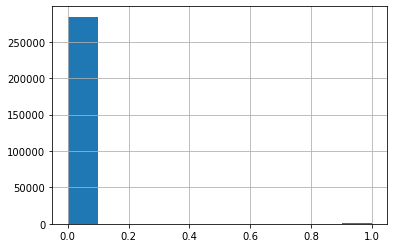

In [37]:
y.hist()

In [36]:
# set input x as all columns (time is irrelevant)
x = df.loc[:, (df.columns != 'Class') & (df.columns != 'Time')]
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


# Neural Network

### Prepare train test split:

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# resample due to immense class imbalance
x_resample, y_resample = ADASYN().fit_resample(x_train, y_train)

### Feature Scaling

In [91]:
scaler = StandardScaler()
scaler.fit(x_resample)
scaler.transform(x_resample)
scaler.fit(x_test)
scaler.transform(x_test)

array([[ 1.06647681, -0.14022069, -2.21028982, ..., -0.26755658,
        -0.26041555, -0.31072413],
       [-0.61671074,  0.29172127,  1.65909293, ...,  0.02723225,
         0.29076007, -0.20722589],
       [ 1.05805058,  0.10110807, -1.12249585, ..., -0.1511973 ,
        -0.08648296, -0.3577308 ],
       ...,
       [-1.09058286, -0.55765048,  0.33998596, ...,  0.09956264,
        -2.16150508, -0.27407982],
       [-4.36348655, -3.21080771, -2.60013222, ...,  9.01419245,
        -0.30906606, -0.21558263],
       [-0.70885731,  0.3580941 , -0.49758282, ...,  0.49574633,
        -0.01692518,  2.45824036]])

In [49]:
model = Sequential()
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1,kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [51]:
x_train_tensor = tf.convert_to_tensor(x_resample, dtype=tf.int64)
y_train_tensor = tf.convert_to_tensor(y_resample, dtype=tf.int64)
x_test_tensor = tf.convert_to_tensor(x_test, dtype=tf.int64)
y_test_tensor = tf.convert_to_tensor(y_test,dtype=tf.int64)

In [56]:
history = model.fit(x_train_tensor, y_train_tensor, epochs = 5,batch_size = 6, validation_data=[x_test_tensor,y_test_tensor])

Epoch 1/5
75815/75815 [==============================] - 107s 1ms/step - loss: 0.1955 - accuracy: 0.9414 - val_loss: 0.2602 - val_accuracy: 0.9580
Epoch 2/5
75815/75815 [==============================] - 104s 1ms/step - loss: 0.1901 - accuracy: 0.9436 - val_loss: 0.1534 - val_accuracy: 0.9778
Epoch 3/5
75815/75815 [==============================] - 104s 1ms/step - loss: 0.1897 - accuracy: 0.9423 - val_loss: 0.1937 - val_accuracy: 0.9693
Epoch 4/5
75815/75815 [==============================] - 99s 1ms/step - loss: 0.1865 - accuracy: 0.9459 - val_loss: 0.1942 - val_accuracy: 0.9824
Epoch 5/5
75815/75815 [==============================] - 96s 1ms/step - loss: 0.1873 - accuracy: 0.9450 - val_loss: 0.1504 - val_accuracy: 0.9745


In [205]:
# my code for evaluating metrics got deleted somehow
# I had to round and convert arrays, ill just paste my stored numbers from my paper:

print("Accuracy: 0.9745268775675011")
print("Precision: 0.057856673241288625")
print("Recall: 0.8301886792452831")
print("F1 Score: 0.10817455439459127")


Accuracy: 0.9745268775675011
Precision: 0.057856673241288625
Recall: 0.8301886792452831
F1 Score: 0.10817455439459127


# K-Neighbors

In [94]:
n_neighbors = 12

model_KN = KNeighborsClassifier(n_neighbors, weights='distance')
model_KN.fit(x_resample, y_resample)

KNeighborsClassifier(n_neighbors=12, weights='distance')

In [206]:
y_scores = model_KN.predict(x_test)

print("KNeighbors Precision score: ", precision_score(y_test, y_scores))
print("KNeighbors Recall score: ", recall_score(y_test, y_scores))
print("KNeighbors f1 score: ", f1_score(y_test, y_scores))

KNeighbors Precision score:  0.22077922077922077
KNeighbors Recall score:  0.8018867924528302
KNeighbors f1 score:  0.3462321792260692


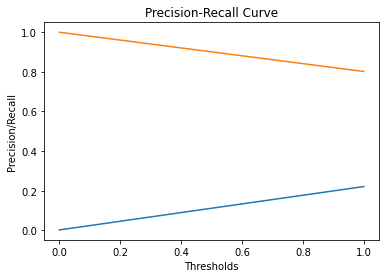

In [223]:
precision, recall, thresholds = skl.metrics.precision_recall_curve(y_test, y_scores)
fig, ax = plt.subplots()
ax.plot(thresholds, precision[:-1])
ax.plot(thresholds, recall[:-1])
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision/Recall')
ax.set_xlabel('Thresholds')
plt.show()


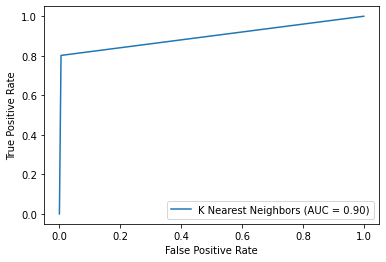

In [224]:
fpr, tpr, thresholds = skl.metrics.roc_curve(y_test, y_scores)
roc_auc = skl.metrics.auc(fpr, tpr)
display = skl.metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='K Nearest Neighbors')
display.plot()

# Decision Tree

In [202]:
model_DecTree = DecisionTreeClassifier()

model_DecTree.fit(x_resample, y_resample)
y_pred = modsel.cross_val_predict(model_DecTree, x_test, y_test, cv = 3)

print("Resampled Decision Tree f1 score: ", f1_score(y_test, y_pred))
print("Resampled Decision Tree Precision score: ", precision_score(y_test, y_pred))
print("Resampled Decision Tree Recall score: ", recall_score(y_test, y_pred))

Resampled Decision Tree f1 score:  0.5851528384279476
Resampled Decision Tree Precision score:  0.5447154471544715
Resampled Decision Tree Recall score:  0.6320754716981132


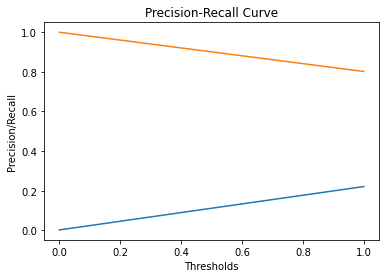

In [226]:
precision, recall, thresholds = skl.metrics.precision_recall_curve(y_test, y_scores)

fig, ax = plt.subplots()
ax.plot(thresholds, precision[:-1])
ax.plot(thresholds, recall[:-1])
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision/Recall')
ax.set_xlabel('Thresholds')
plt.show()

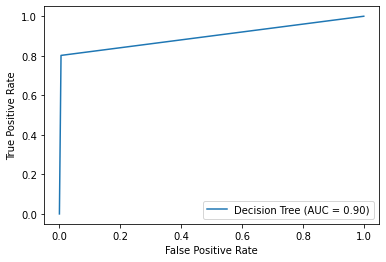

In [225]:
fpr, tpr, thresholds = skl.metrics.roc_curve(y_test, y_scores)
roc_auc = skl.metrics.auc(fpr, tpr)
display = skl.metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree')
display.plot()

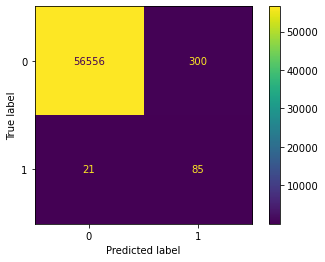

In [227]:
cm = confusion_matrix(y_test, y_scores, labels=model_KN.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_KN.classes_)
disp.plot()